In [169]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [122]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

In [123]:
titanic = pd.read_csv(url)

In [124]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
titanic = titanic.drop(['PassengerId','Name','Ticket'],axis=1)

In [126]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [127]:
titanic.isnull().mean()*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [128]:
# As almost 77% values are missing we can drop Cabin column

In [129]:
titanic.drop('Cabin',axis=1,inplace=True)

In [130]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [131]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


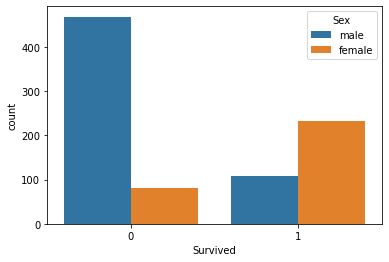

In [132]:
#checking whether dataset is balanced
sns.countplot(x='Survived',data=titanic,hue='Sex')

In [133]:
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [134]:
titanic.corr()['Age']

Survived   -0.077221
Pclass     -0.369226
Age         1.000000
SibSp      -0.308247
Parch      -0.189119
Fare        0.096067
Name: Age, dtype: float64

In [135]:
# Age has some negative correlation with Pclass.

In [136]:
titanic.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


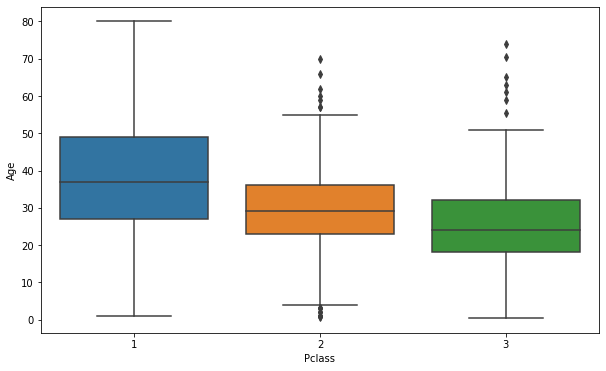

In [137]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [138]:
#Pclass can be used to fill the missing values in Age

In [139]:
def impute_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    if pd.isnull(Age):
        if Pclass==3:
             return titanic[titanic['Pclass']==3]['Age'].mean()
            
        elif Pclass==2:
            return titanic[titanic['Pclass']==2]['Age'].mean()
            
        else:
            return titanic[titanic['Pclass']==1]['Age'].mean()
        
    else:
        return Age
    

In [140]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

In [141]:
titanic = titanic.dropna()

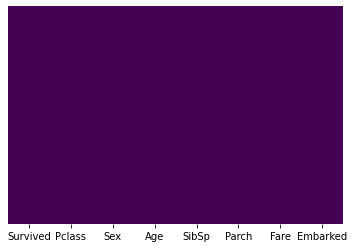

In [142]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [143]:
# No missing values

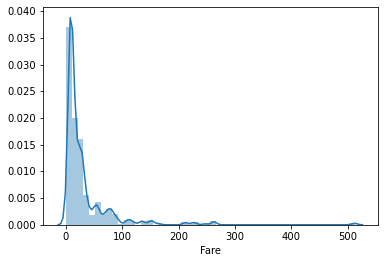

In [144]:
sns.distplot(titanic['Fare'])

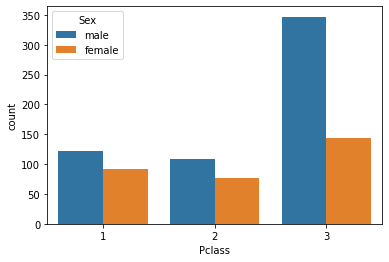

In [145]:
sns.countplot(x='Pclass',data=titanic,hue='Sex')

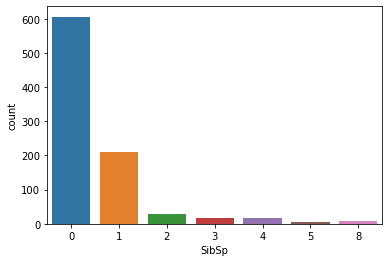

In [146]:
sns.countplot(x='SibSp',data=titanic)

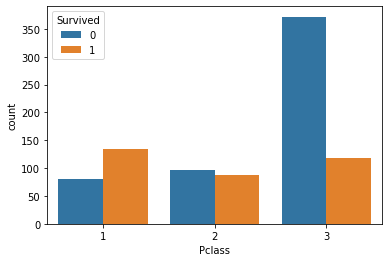

In [147]:
sns.countplot(x='Pclass',data=titanic,hue='Survived')

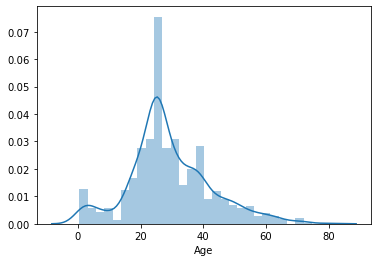

In [148]:
sns.distplot(titanic['Age'],bins=30)

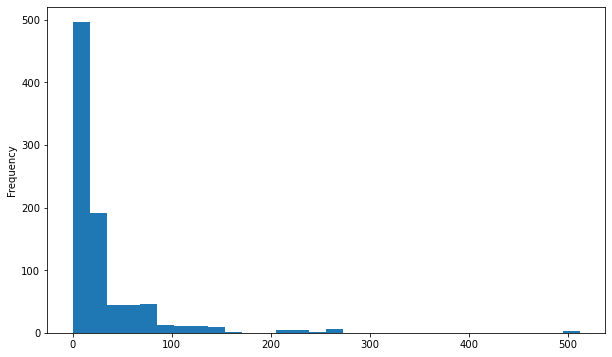

In [149]:
titanic['Fare'].plot.hist(bins=30,figsize=(10,6))

In [188]:
# Handling the categorical variables

In [151]:
titanic['Sex'] = titanic['Sex'].map({'male':1,'female':0})

In [152]:
df1 = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [154]:
titanic = pd.concat([titanic,df1],axis=1)

In [156]:
titanic.drop('Embarked',axis=1,inplace=True)

In [157]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [162]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=355)

In [164]:
dec_classifier = DecisionTreeClassifier()

In [165]:
dec_classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [167]:
dec_classifier.score(X_train,y_train)

0.9887459807073955

In [166]:
dec_classifier.score(X_test,y_test)

0.7565543071161048

In [168]:
# Clearly the model is overfitting

In [170]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [171]:
grid_search = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [172]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'm

In [173]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [180]:
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [181]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [182]:
classifier.score(X_train,y_train)

0.8745980707395499

In [183]:
classifier.score(X_test,y_test)

0.8239700374531835

In [ ]:
#Accuracy is increased using Grid Search CV

In [184]:
y_pred = classifier.predict(X_test)

In [186]:
from sklearn.metrics import classification_report

In [187]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       164
           1       0.87      0.64      0.74       103

    accuracy                           0.82       267
   macro avg       0.84      0.79      0.80       267
weighted avg       0.83      0.82      0.82       267

